In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from random import random
import inspect
import seaborn as sns

# Q1 

Part 1의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기 

prior ---------------------------------------------------------> posterior

$beta(a, b)$ -------- [ y = 437, n = 980 ]-----------> $beta(a + y, b + n - y)$

a/(a+b) = 0.485

In [ ]:
def draw_prior_posterior(k, strong = False):
  ## K 값이 클 수록 strong prior
  ## strong = True : Strong Likelihood
  a = 0.485*k  # a/(a+b) = 0.485  # k = a + b
  b = k - a
  y = 437; n = 980
  if strong == True:
    y *= 10; n *= 10 # Strong Likelihood
  prior = scipy.stats.beta(a, b)
  posterior = scipy.stats.beta(a + y, b + n - y)

  x = np.linspace(0.4, 0.6, 10000) 
  plt.axvline(y/n)
  plt.plot(x, prior.pdf(x), 'k-', lw=2, color = "b", label = "prior")
  plt.plot(x, posterior.pdf(x), 'k-', lw=2, color = "r", label = "posterior")
  plt.legend()
  plt.xlim(0.4, 0.6)
  plt.title(f"k = {k}, strong = {strong}")

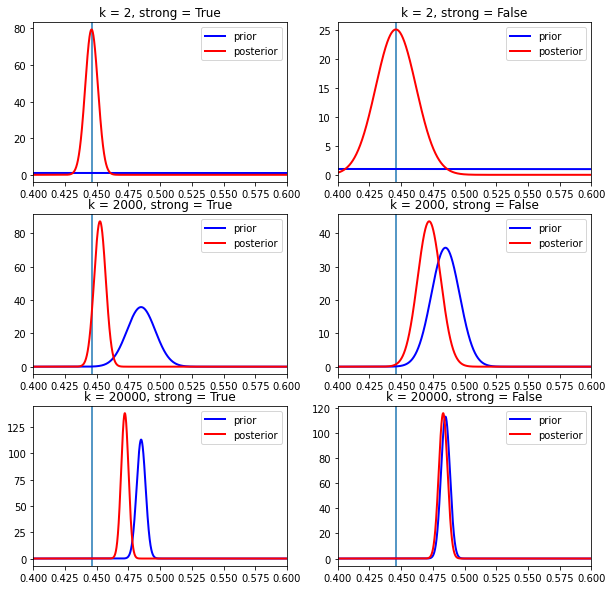

In [ ]:
f, axes = plt.subplots(3, 2, figsize = (10, 10))

plt.subplot(3, 2, 1)
draw_prior_posterior(2, strong=True)

plt.subplot(3, 2, 3)
draw_prior_posterior(2000, strong=True)

plt.subplot(3, 2, 5)
draw_prior_posterior(20000, strong=True)

plt.subplot(3, 2, 2)
draw_prior_posterior(2, strong=False)

plt.subplot(3, 2, 4)
draw_prior_posterior(2000, strong=False)

plt.subplot(3, 2, 6)
draw_prior_posterior(20000, strong=False)

plt.show()

# Q2

Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes. 

* ***show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$***

P: parents / C: child / B: Brown eyes / H: heterozygotes (H ⊂ B)

$P(CH|PB∩CB)$ = $\frac{P(CH∩PB∩CB)}{P(PB∩CB)}$ = $\frac{P(CH∩PB)}{P(PB∩CB)}$
= $\frac{P(PB)×P(CH∩PB|PB)}{P(PB)×P(CB∩PB|PB)}$

Parents -> child

XX * XX -> 100% brown, 0% heterozygotes

H * XX -> 100% brown, 50% heterozygotes

H * H -> 75% brown, 50% heterozygotes

P(XX * XX) = ${((1-p)^2)^2}$

P(H * XX) = ${2 × (2p(1-p)×(1-p)^2)}$

P(H * H) = ${(2p(1-p))^2}$

∴ $P(CH|PB∩CB)$ = $\frac{
 0 ×{((1-p)^2)^2} + (1/2)×{2 × (2p(1-p)×(1-p)^2)} + (1/2)×{(2p(1-p))^2}

}{

 1×{((1-p)^2)^2} + 1×{2 × (2p(1-p)×(1-p)^2)}+ (3/4)×{(2p(1-p))^2}
}$
= $\frac{2p}{2p+1}$


* **Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes.**

$P(\theta) = P(H)$ ( H : Judy = Heterozygote )

$P(H|y) = \frac{P(y|H)P(H)}{P(y)} =  \frac{P(y|H)P(H)}{P(H)P(y|H) + P(XX)P(y|XX)}$ 

$P(H) = \frac{2p}{2p+1}$ # prior

$P(y|H) = (3/4)^n$ #Xx와 Xx의 matching에서 모든 아이가 갈색 눈을 가질 확률

$P(y) = {P(H)P(y|H) + P(XX)P(y|XX)} = \frac{2p}{2p+1}×(3/4)^n+\frac{1}{2p+1}× (1)^n  $

∴ $P(H|y) = \frac{(\frac{2p}{2p+1}) × (3/4)^n}{ \frac{2p}{2p+1}×(3/4)^n+\frac{1}{2p+1}× (1)^n }$





# Q3
**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**   

a) Beta distribution으로 위의 belief을 survival rate에 관한 prior distribution으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)


b) 이제 data gathering. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 Posterior Distribution 구하기. 

$Y|\theta$ ~ $binom(n, \theta)$

$\theta$ : survival rate ~ $beta(a, b)$

-> $(\theta|Y = y)$ ~ $beta(a+y, b+n-y)$ #(p. 5)

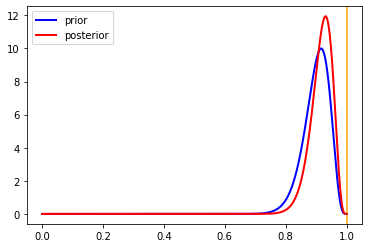

In [ ]:
from scipy.stats import beta

fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 10000)

b = 5; a = 9*b 
prior = beta(a, b) 
# a / (a + b) = 0.9
# print(prior.cdf(0.97)-prior.cdf(0.8)) # 0.8 이상, 0.97 이하일 확률이 0.95 이상 : 

n = 10; y = 10
(a, b) = (a + y, b + n - y)
posterior = beta(a, b)

ax.axvline(1, color = "orange")
ax.plot(x, prior.pdf(x), 'k-', lw=2, color = "b", label = "prior")
ax.plot(x, posterior.pdf(x), 'k-', lw=2, color = "r", label = "posterior")
ax.legend()

c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)

$P(Y=y) = \int p(y, \theta) d\theta =\int p(y|\theta) p(\theta) d\theta$

$Y|\theta$ ~ $binom(N, \theta)$

$\theta$ ~ $beta(a+y, b+n-y)$ # posterior

$Y$ ~ $beta-binom(n, a', b')$

* 다음 영상을 참고 : https://www.youtube.com/watch?v=ZL5cv1FiFn4 

In [ ]:
from scipy.stats import betabinom

predict = betabinom(1, a, b) # a, b : from posterior
print("다음 환자가 생존할 확률: ", predict.pmf(1))

predict = betabinom(20, a, b) # a, b : from posterior
print("20명의 환자 중 2명 이상 사망할 확률: ", predict.cdf(18))

다음 환자가 생존할 확률:  0.9166666666666672
20명의 환자 중 2명 이상 사망할 확률:  0.47768099160504135
